<a href="https://colab.research.google.com/github/rorocabezas/Detector_Neumonia_UDD/blob/master/UDD_Proyecto_M7_Rodrigo_Cabezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Paso 0: Montar Google Drive

In [1]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/UDD Bootcamps/Modulo 7/Proyecto_Final')

Mounted at /content/drive


In [2]:
import gc
gc.enable()  # Activar recolección de basura automática

# Etapa 1: Configuración del Entorno y Carga de Datos

In [3]:
# Importar las bibliotecas necesarias
!pip install keras-tuner

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from kerastuner import RandomSearch
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.mixed_precision import Policy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.8 MB/s eta 0:00:00


<ipython-input-3-12f01e7379b9>:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [4]:
# Suprime las advertencias de TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Etapa 2: Limpieza y Análisis Exploratorio de Datos (EDA)

In [5]:
# Ruta donde se encuentran las imagenes de rayos X
data_dir = '/content/drive/MyDrive/UDD Bootcamps/Modulo 7/Proyecto_Final/chest_xray'

In [6]:
# Definir las rutas de las imágenes
normal_cases_dir = os.path.join(data_dir, 'chest_xray/train/NORMAL')  # Directorio de casos normales
pneumonia_cases_dir = os.path.join(data_dir, 'chest_xray/train/PNEUMONIA')  # Directorio de casos de neumonía

# Verificar la cantidad de imágenes en cada categoría
normal_cases = len(os.listdir(normal_cases_dir))  # Contar archivos en directorio normal
pneumonia_cases = len(os.listdir(pneumonia_cases_dir))  # Contar archivos en directorio de neumonía

print(f'Número de casos normales: {normal_cases}')  # Mostrar conteo de casos normales
print(f'Número de casos de neumonía: {pneumonia_cases}')  # Mostrar conteo de casos de neumonía

Número de casos normales: 1342
Número de casos de neumonía: 3876


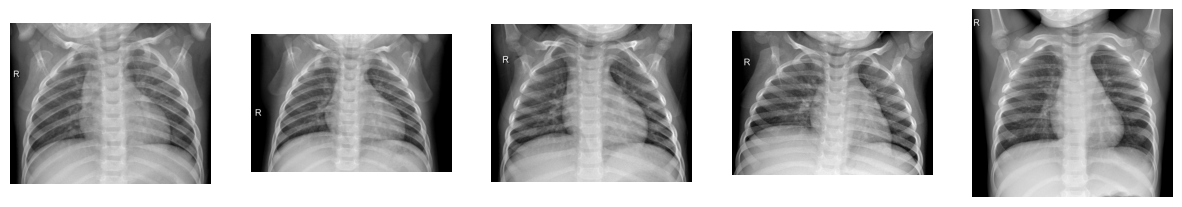

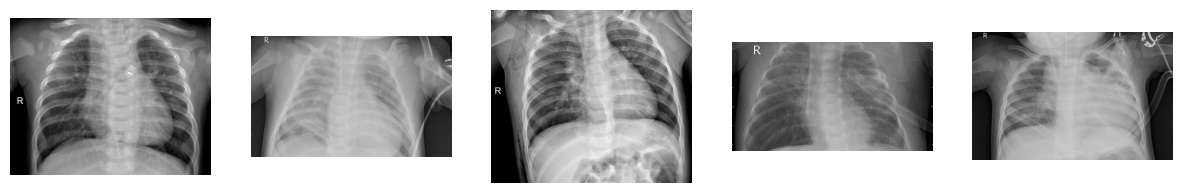

In [7]:
# Visualizar algunas imágenes de ejemplo
def plot_samples(data_dir, category, n=5):
    files = os.listdir(os.path.join(data_dir, category))
    plt.figure(figsize=(15, 10))
    for i in range(n):
        plt.subplot(1, n, i+1)
        img_path = os.path.join(data_dir, category, files[i])
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

# Visualizar ejemplos de cada categoría
plot_samples(data_dir, 'train/NORMAL')    # Casos normales
plot_samples(data_dir, 'train/PNEUMONIA') # Casos con neumonía

In [8]:
# Analizar distribución de clases
total_images = normal_cases + pneumonia_cases
print(f"\nDistribución de datos:")
print(f"- Total de imágenes: {total_images}")
print(f"- Porcentaje de casos normales: {(normal_cases/total_images)*100:.2f}%")
print(f"- Porcentaje de casos de neumonía: {(pneumonia_cases/total_images)*100:.2f}%")


Distribución de datos:
- Total de imágenes: 5218
- Porcentaje de casos normales: 25.72%
- Porcentaje de casos de neumonía: 74.28%


# Etapa 3: Preprocesamiento de Datos

In [9]:
# Configurar el generador de imágenes para el entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),
    batch_size=256,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),
    batch_size=256,
    class_mode='binary',
    subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


# Etapa 4: Construcción y Entrenamiento del Modelo

In [10]:
# Definir el modelo CNN
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), #revisar que optimizador aplicar
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping])

gc.collect()  # Liberar memoria manualmente

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2544s 151s/step - accuracy: 0.5574 - loss: 2.8634 - val_accuracy: 0.7430 - val_loss: 0.6111
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7378 - loss: 0.5962 - val_accuracy: 0.7430 - val_loss: 0.6121
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.7485 - loss: 0.5534 - val_accuracy: 0.7430 - val_loss: 0.6009
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7344 - loss: 0.4904 - val_accuracy: 0.7430 - val_loss: 0.4989
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.7441 - loss: 0.4033 - val_accuracy: 0.7430 - val_loss: 0.4343
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.7402 - loss: 0.3638 - val_accuracy: 0.8236 - val_loss: 0.4382
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.8437 - loss: 0.3332 - val_accuracy: 0.8629 - val_loss: 0.4090
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.8588 - loss: 0.3188 - val_accuracy: 0.8754 - val_l

15284

In [13]:
gc.collect()  # Liberar memoria manualmente

0

# Etapa 5: Evaluación del Modelo y Métricas

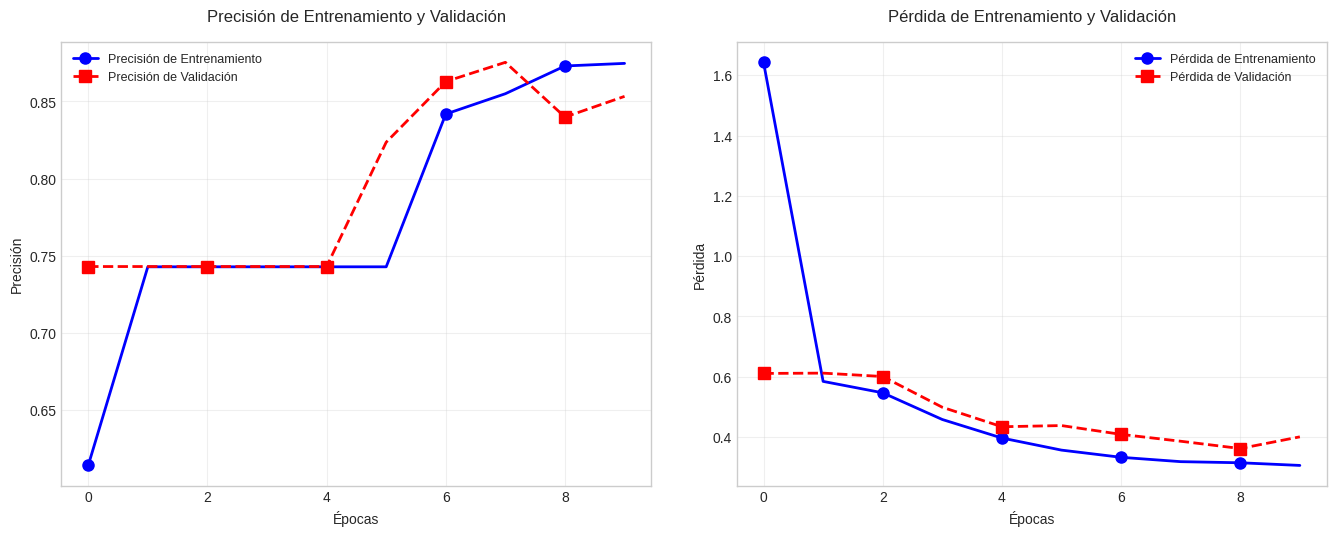


Resultados Clave:
Precisión máxima de entrenamiento: 0.8747
Precisión máxima de validación: 0.8754
Pérdida final de entrenamiento: 0.3060
Pérdida final de validación: 0.4008


In [14]:
# Graficar la precisión y la pérdida del modelo
def plot_metrics_improved(history):
    # Configurar estilo moderno
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = [14, 6]

    # Obtener métricas
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    # Primera subplot - Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', linewidth=2, markersize=8,
             marker='o', markevery=2, label='Precisión de Entrenamiento')
    plt.plot(epochs, val_acc, 'r--', linewidth=2, markersize=8,
             marker='s', markevery=2, label='Precisión de Validación')
    plt.title('Precisión de Entrenamiento y Validación', pad=15, fontsize=12)
    plt.xlabel('Épocas', fontsize=10)
    plt.ylabel('Precisión', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

    # Segunda subplot - Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', linewidth=2, markersize=8,
             marker='o', markevery=2, label='Pérdida de Entrenamiento')
    plt.plot(epochs, val_loss, 'r--', linewidth=2, markersize=8,
             marker='s', markevery=2, label='Pérdida de Validación')
    plt.title('Pérdida de Entrenamiento y Validación', pad=15, fontsize=12)
    plt.xlabel('Épocas', fontsize=10)
    plt.ylabel('Pérdida', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

    # Ajustar layout y mostrar
    plt.tight_layout(pad=3.0)
    plt.show()

    # Calcular estadísticas clave
    best_train_acc = max(acc)
    best_val_acc = max(val_acc)
    final_train_loss = loss[-1]
    final_val_loss = val_loss[-1]

    print("\nResultados Clave:")
    print(f"Precisión máxima de entrenamiento: {best_train_acc:.4f}")
    print(f"Precisión máxima de validación: {best_val_acc:.4f}")
    print(f"Pérdida final de entrenamiento: {final_train_loss:.4f}")
    print(f"Pérdida final de validación: {final_val_loss:.4f}")

plot_metrics_improved(history)

In [15]:
# Evaluar el modelo en el conjunto de validación
try:
    validation_loss, validation_accuracy = model.evaluate(validation_generator)
    print(f'Pérdida de Validación: {validation_loss}')
    print(f'Precisión de Validación: {validation_accuracy}')
except Exception as e:
    print(f'Error al evaluar el modelo: {e}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8552 - loss: 0.3540
Pérdida de Validación: 0.3564935028553009
Precisión de Validación: 0.8475551009178162


In [16]:
# Obtener las predicciones y las etiquetas verdaderas
y_pred = (model.predict(validation_generator) > 0.5).astype("int32")
y_true = validation_generator.classes

# Calcular métricas clave
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
Precision: 0.7436743674367436
Recall: 0.8722580645161291
F1-Score: 0.8028503562945368


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


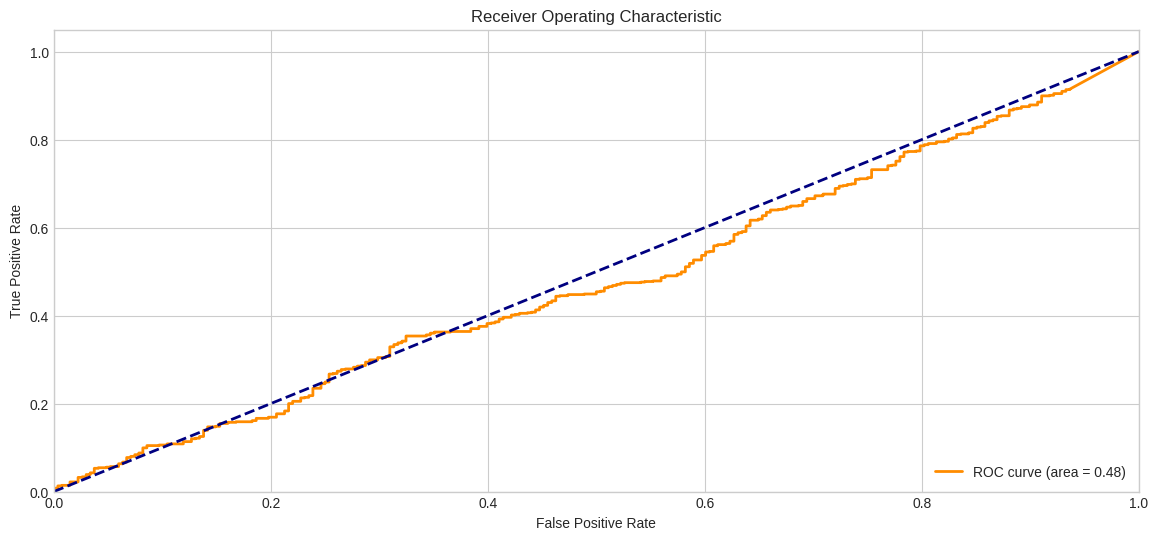

In [17]:
# Obtener las probabilidades de predicción para la clase positiva
y_scores = model.predict(validation_generator).ravel()

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

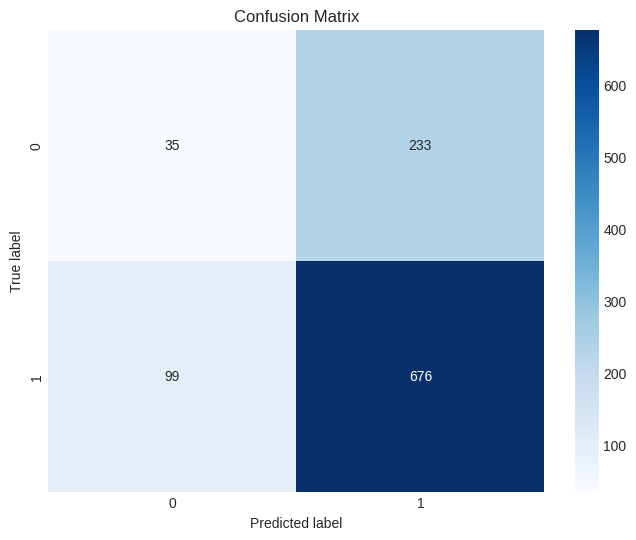

In [18]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Etapa 6: Ajuste de Hiperparámetros y Ensambles

In [19]:
# Ajuste de hiperparámetros utilizando Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(150, 150, 3)))
    model.add(Conv2D(hp.Int('filters_1', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))

    model.add(Conv2D(hp.Int('filters_2', 64, 256, step=64), (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))

    model.add(Conv2D(hp.Int('filters_3', 128, 512, step=128), (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(hp.Int('units', 512, 1024, step=256), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='pneumonia_detection')

tuner.search(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('best_model.keras')

tuner.results_summary()

Reloading Tuner from kt_dir/pneumonia_detection/tuner0.json
Results summary
Results in kt_dir/pneumonia_detection
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
filters_1: 96
filters_2: 64
filters_3: 128
units: 768
dropout: 0.30000000000000004
learning_rate: 0.0012513800047239778
Score: 0.9376797676086426

Trial 2 summary
Hyperparameters:
filters_1: 96
filters_2: 64
filters_3: 256
units: 512
dropout: 0.4
learning_rate: 0.000505466655750672
Score: 0.9309683442115784

Trial 3 summary
Hyperparameters:
filters_1: 96
filters_2: 64
filters_3: 256
units: 512
dropout: 0.4
learning_rate: 0.001715074355925934
Score: 0.8830296993255615

Trial 1 summary
Hyperparameters:
filters_1: 64
filters_2: 192
filters_3: 384
units: 512
dropout: 0.30000000000000004
learning_rate: 0.0005781511315714686
Score: 0.8811121582984924

Trial 4 summary
Hyperparameters:
filters_1: 128
filters_2: 64
filters_3: 512
units: 512
dropout: 0.30000000000000004
learning_r

In [20]:
# Evaluar el Mejor Modelo
try:
    loss, accuracy = best_model.evaluate(validation_generator)
    print(f'Validation Loss: {loss}')
    print(f'Validation Accuracy: {accuracy}')
except Exception as e:
    print(f'Error al evaluar el mejor modelo: {e}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9207 - loss: 0.1922
Validation Loss: 0.1829638034105301
Validation Accuracy: 0.9280920624732971


In [21]:
#Guardar el Mejor Modelo en formato nativo de Keras
best_model.save('best_model.keras')